## Skoltech
## Intro to data science, fall 2022
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://forms.gle/4q7o3aBVduyPgWzv9

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza: https://piazza.com/class/l8q9rqodz872zj

## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Read the data

In [63]:
df = pd.read_csv('credit_score_dataset.csv')

## 1. Data exploration

Let's take a closer look at the data.

In [3]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Q1.1

#### How many columns in the dataset?

In [4]:
df.shape[1]

18

### Q1.2

#### How many unique ethnicities are there?

In [5]:
df.nunique()['Ethnicity']

5

### Q1.3
#### What is the average age? Please answer with an integer. Please, use int().

In [6]:
int(df['Age'].mean())

31

### Q1.4
#### People working in which industry are getting the most income on average?

In [7]:
df.groupby('Industry')['Income'].mean().idxmax()

'Transport'

### Q1.5

#### Assuming that column 'YearsEmployed' counts years from the first employment until the current moment, in what age people start working? Build a histogram for the age of the first employment. What is the average age to start working at? Please, answer with a float.

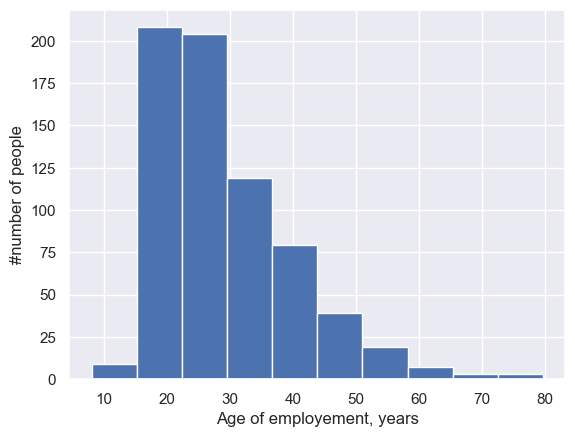

In [8]:
df['age_of_employement'] = df['Age'] - df['YearsEmployed']
plt.hist(df['age_of_employement']);
plt.ylabel('#number of people')
plt.xlabel('Age of employement, years');

In [9]:
print('Mean: ', round(df['age_of_employement'].mean(),3))
print('Min: ', round(df['age_of_employement'].min(),3))

Mean:  29.291
Min:  8.08


### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for columns from ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'] with 'Approved' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how loan application approval relates to other features. Note, you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) People over 40 years old have less debt than people under 40 years old
- (b) A credit application with low credit score is approved almost always
- (c) There is no clear dependence between debt and years employed
- (d) High income means high credit score

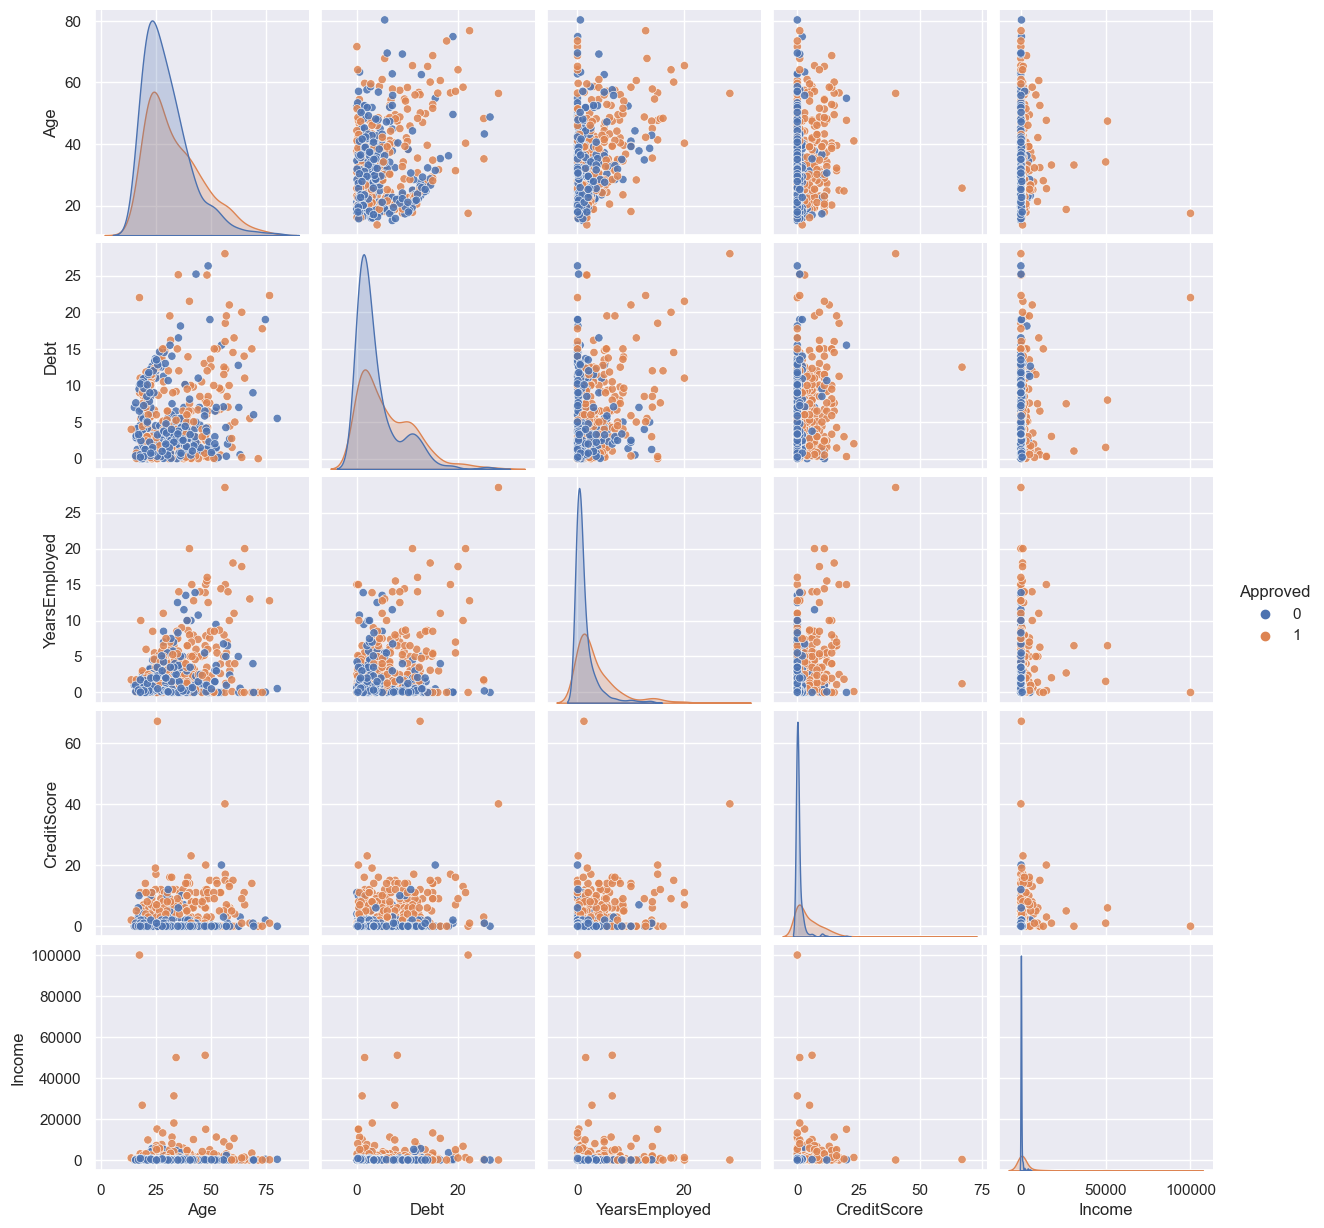

In [10]:
sns.pairplot(df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Approved']], hue="Approved",kind='scatter', plot_kws=dict(alpha=0.85));

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for ethnicity and industry. How many Latino people are working in healthcare?

In [11]:
x = pd.crosstab(df['Ethnicity'],df['Industry'])
x.loc['Latino','Healthcare']

52

## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that are exactly the same for all of the people. Let's drop one of them. As an answer, write the names of these columns divided by a comma.

In [12]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,age_of_employement
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1,29.58
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1,55.63
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1,23.00
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1,24.08
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1,18.46


In [13]:
df['BankCustomer'].equals(df['BankRecord'])

True

In [64]:
del df['BankRecord']

### Q2.2

Now it's time to talk about the task for today. Our bank wants to predict whether the application for a loan is worthy or not. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'Approved' column) and data (the rest of the columns). How many positive labels are there in target?


In [15]:
y = df.Approved
X = df.loc[:,df.columns != 'Approved']
np.shape(y[y>0].values)[0]

307

### Q2.3

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 314 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=314,
                                                    shuffle=True,
                                                    stratify=None
                                                   )
np.shape(y_test[y_test>0].values)[0]

84

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, k neighbors classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form as categorical, so let's make a copy of x with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

In [17]:
X_train_copy = X_train[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']]
X_test_copy = X_test[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']]


### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(max_iter=5000)
clf.fit(X_train_copy, y_train )
y_pred = clf.predict(X_test_copy)

f1_score(y_test, y_pred)

0.8620689655172413

### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_copy, y_train )
y_pred = clf.predict(X_test_copy)

f1_score(y_test, y_pred)

0.646341463414634

### Q3.3

Build a random forest classifier with n_estimators = 5. What is the f1_score for the model?

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 5)
clf.fit(X_train_copy, y_train )
y_pred = clf.predict(X_test_copy)

f1_score(y_test, y_pred)

0.8588957055214723

### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. You can use verbose argument of GridSearchCV in order to watch the progress of cross-validation. What is the f1 score for the model trained on the full train dataset with this regularization?

In [21]:
X_train.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,age_of_employement
457,1,29.67,0.750,0,0,Energy,2.65,White,0.040,0,0,0,0,ByBirth,240,0,29.630
547,1,23.92,1.500,1,1,Real Estate,6.33,Black,1.875,1,1,6,0,ByBirth,200,327,22.045
34,0,22.58,10.750,1,1,Materials,5.58,White,0.415,1,1,5,1,ByBirth,0,560,22.165
251,1,41.42,5.000,1,1,Materials,4.70,Black,5.000,1,1,6,1,ByBirth,470,0,36.420
424,1,33.67,2.165,1,1,Energy,6.24,White,1.500,0,0,0,0,Temporary,120,0,32.170


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits = 5, shuffle = False)
clf = LogisticRegression(max_iter=5000)
params = {'C': np.logspace(-10,1,18)}
gs = GridSearchCV(estimator = clf, param_grid = params, cv = cv, verbose=1)
gs.fit(X_train_copy, y_train);


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [23]:
gs.best_score_

0.8447594501718212

In [24]:
y_pred = gs.predict(X_test_copy)
f1_score(y_test, y_pred)

0.8620689655172413

### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [25]:
clf = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,52,2),'weights': ['uniform', 'distance'], 'p': np.arange(1,8)}
gs = GridSearchCV(estimator = clf, param_grid = params, cv = cv, verbose = 1)
gs.fit(X_train_copy, y_train);

Fitting 5 folds for each of 364 candidates, totalling 1820 fits


In [26]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [27]:
gs.best_score_

0.7058204467353951

In [28]:
y_pred = gs.best_estimator_.predict(X_test_copy)
f1_score(y_test, y_pred)

0.6419753086419754

### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [29]:
clf = RandomForestClassifier()
params = {'n_estimators': np.arange(1,52,2),'max_features': ["sqrt", "log2", None, 1,2,3,4,5,6,7,8,9,10]}
gs = GridSearchCV(estimator = clf, param_grid = params, cv = cv, verbose = 1)
gs.fit(X_train_copy, y_train);

Fitting 5 folds for each of 338 candidates, totalling 1690 fits


In [30]:
gs.best_estimator_

RandomForestClassifier(max_features=3, n_estimators=51)

In [31]:
gs.best_score_

0.8593213058419243

In [32]:
y_pred = gs.best_estimator_.predict(X_test_copy)
f1_score(y_test, y_pred)

0.8837209302325582

## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'. 

What is the maximum value of Income now in the test set?

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income']
scaler.fit(X_train[features])
scaler.fit(X_test[features])

X_train[features] = scaler.transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

round(X_test['Income'].max(),3)

11.81

### Q4.2
We have three categorical columns - 'Industry', 'Ethnicity' and 'Citizen'. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Industry', 'Ethnicity' and 'Citizen' columns.

How many columns do we have now?

In [65]:

cat = ['Industry', 'Ethnicity', 'Citizen']
features = pd.get_dummies(df[cat])
df = pd.concat([df,features],axis = 1)
df

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,Ethnicity,YearsEmployed,PriorDefault,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,1,30.83,0.000,1,1,Industrials,3.65,White,1.25,1,...,0,0,0,0,0,0,1,1,0,0
1,0,58.67,4.460,1,1,Materials,1.94,Black,3.04,1,...,0,0,0,1,0,0,0,1,0,0
2,0,24.50,0.500,1,1,Materials,8.15,Black,1.50,1,...,0,0,0,1,0,0,0,1,0,0
3,1,27.83,1.540,1,1,Industrials,7.99,White,3.75,1,...,0,0,0,0,0,0,1,1,0,0
4,1,20.17,5.625,1,1,Industrials,2.37,White,1.71,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,7.30,Black,1.25,0,...,0,0,0,1,0,0,0,1,0,0
686,0,22.67,0.750,1,1,Energy,1.79,White,2.00,0,...,0,0,0,0,0,0,1,1,0,0
687,0,25.25,13.500,0,0,Healthcare,7.64,Latino,2.00,0,...,0,0,0,0,1,0,0,1,0,0
688,1,17.92,0.205,1,1,ConsumerStaples,4.92,White,0.04,0,...,0,0,0,0,0,0,1,1,0,0


In [66]:
df = df.drop(cat, axis=1)

In [67]:
df.shape


(690, 36)

### Q4.3

To check the effects of the modification, train the logistic regression with **updated** optimal C. What is the f1 score now?

In [36]:
y = df.Approved
X = df.iloc[:, df.columns != 'Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=314,
                                                    shuffle=True,
                                                   )

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
clf = LogisticRegression(max_iter=5000)

params = {'C': np.logspace(-10,1,18)}
gs = GridSearchCV(estimator = clf, param_grid = params, cv = cv, verbose=1)
gs.fit(X_train, y_train);


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [38]:
gs.best_estimator_

LogisticRegression(C=0.11450475699382812, max_iter=5000)

In [39]:
gs.best_score_

0.8510524054982819

In [40]:
y_pred = gs.predict(X_test)
y_proba = gs.predict_proba(X_test)
y_proba = y_proba[:, 1]
f1_score(y_test, y_pred)

0.8875739644970414

### Q4.4

Another popular performance metric is the ROC curve. Train a k-NN and logistic regression with **updated** optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

In [41]:
clf_n = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,52,2),'weights': ['uniform', 'distance'], 'p': np.arange(1,8)}
gs_n = GridSearchCV(estimator = clf_n, param_grid = params, cv = cv, verbose = 1)
gs_n.fit(X_train, y_train);

Fitting 5 folds for each of 364 candidates, totalling 1820 fits


In [42]:
gs_n.best_estimator_

KNeighborsClassifier(n_neighbors=47, p=1)

In [43]:
gs_n.best_score_

0.8365335051546392

In [44]:
y_pred_n = gs_n.predict(X_test)
y_proba_n = gs_n.predict_proba(X_test)
y_proba_n = y_proba_n[:, 1]
f1_score(y_test, y_pred_n)

0.8181818181818182

Text(0.5, 1.0, '2-nd class ROC curve (knn): ROC AUC=0.85')

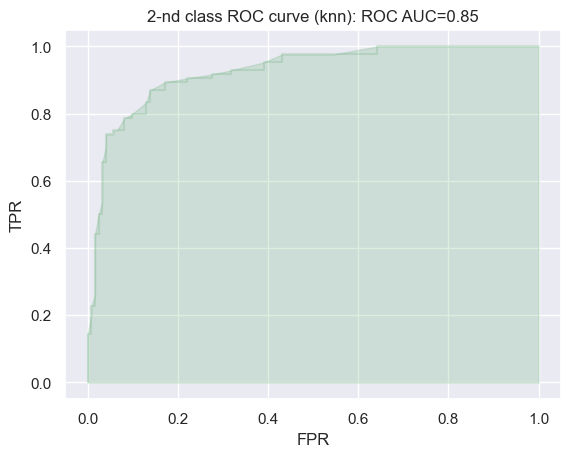

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_n, tpr_n, _ = roc_curve(y_test, y_proba_n)
plt.step(fpr_n, tpr_n, color='g', alpha=0.2, where='post')
plt.fill_between(fpr_n, tpr_n, color='g', alpha=0.2)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('2-nd class ROC curve (knn): ROC AUC={0:0.2f}'.format(roc_auc_score(y_test, y_pred_n)))

Text(0.5, 1.0, '2-nd class ROC curve (linear_regression): ROC AUC=0.91')

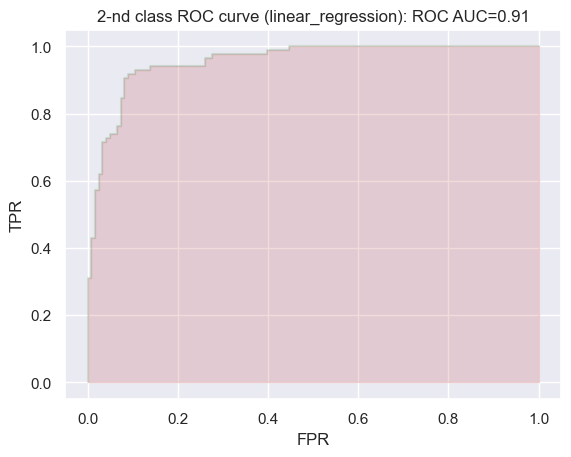

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.step(fpr, tpr, color='g', alpha=0.2, where='post')
plt.fill_between(fpr, tpr, color='r', alpha=0.2)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('2-nd class ROC curve (linear_regression): ROC AUC={0:0.2f}'.format(roc_auc_score(y_test, y_pred)))

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

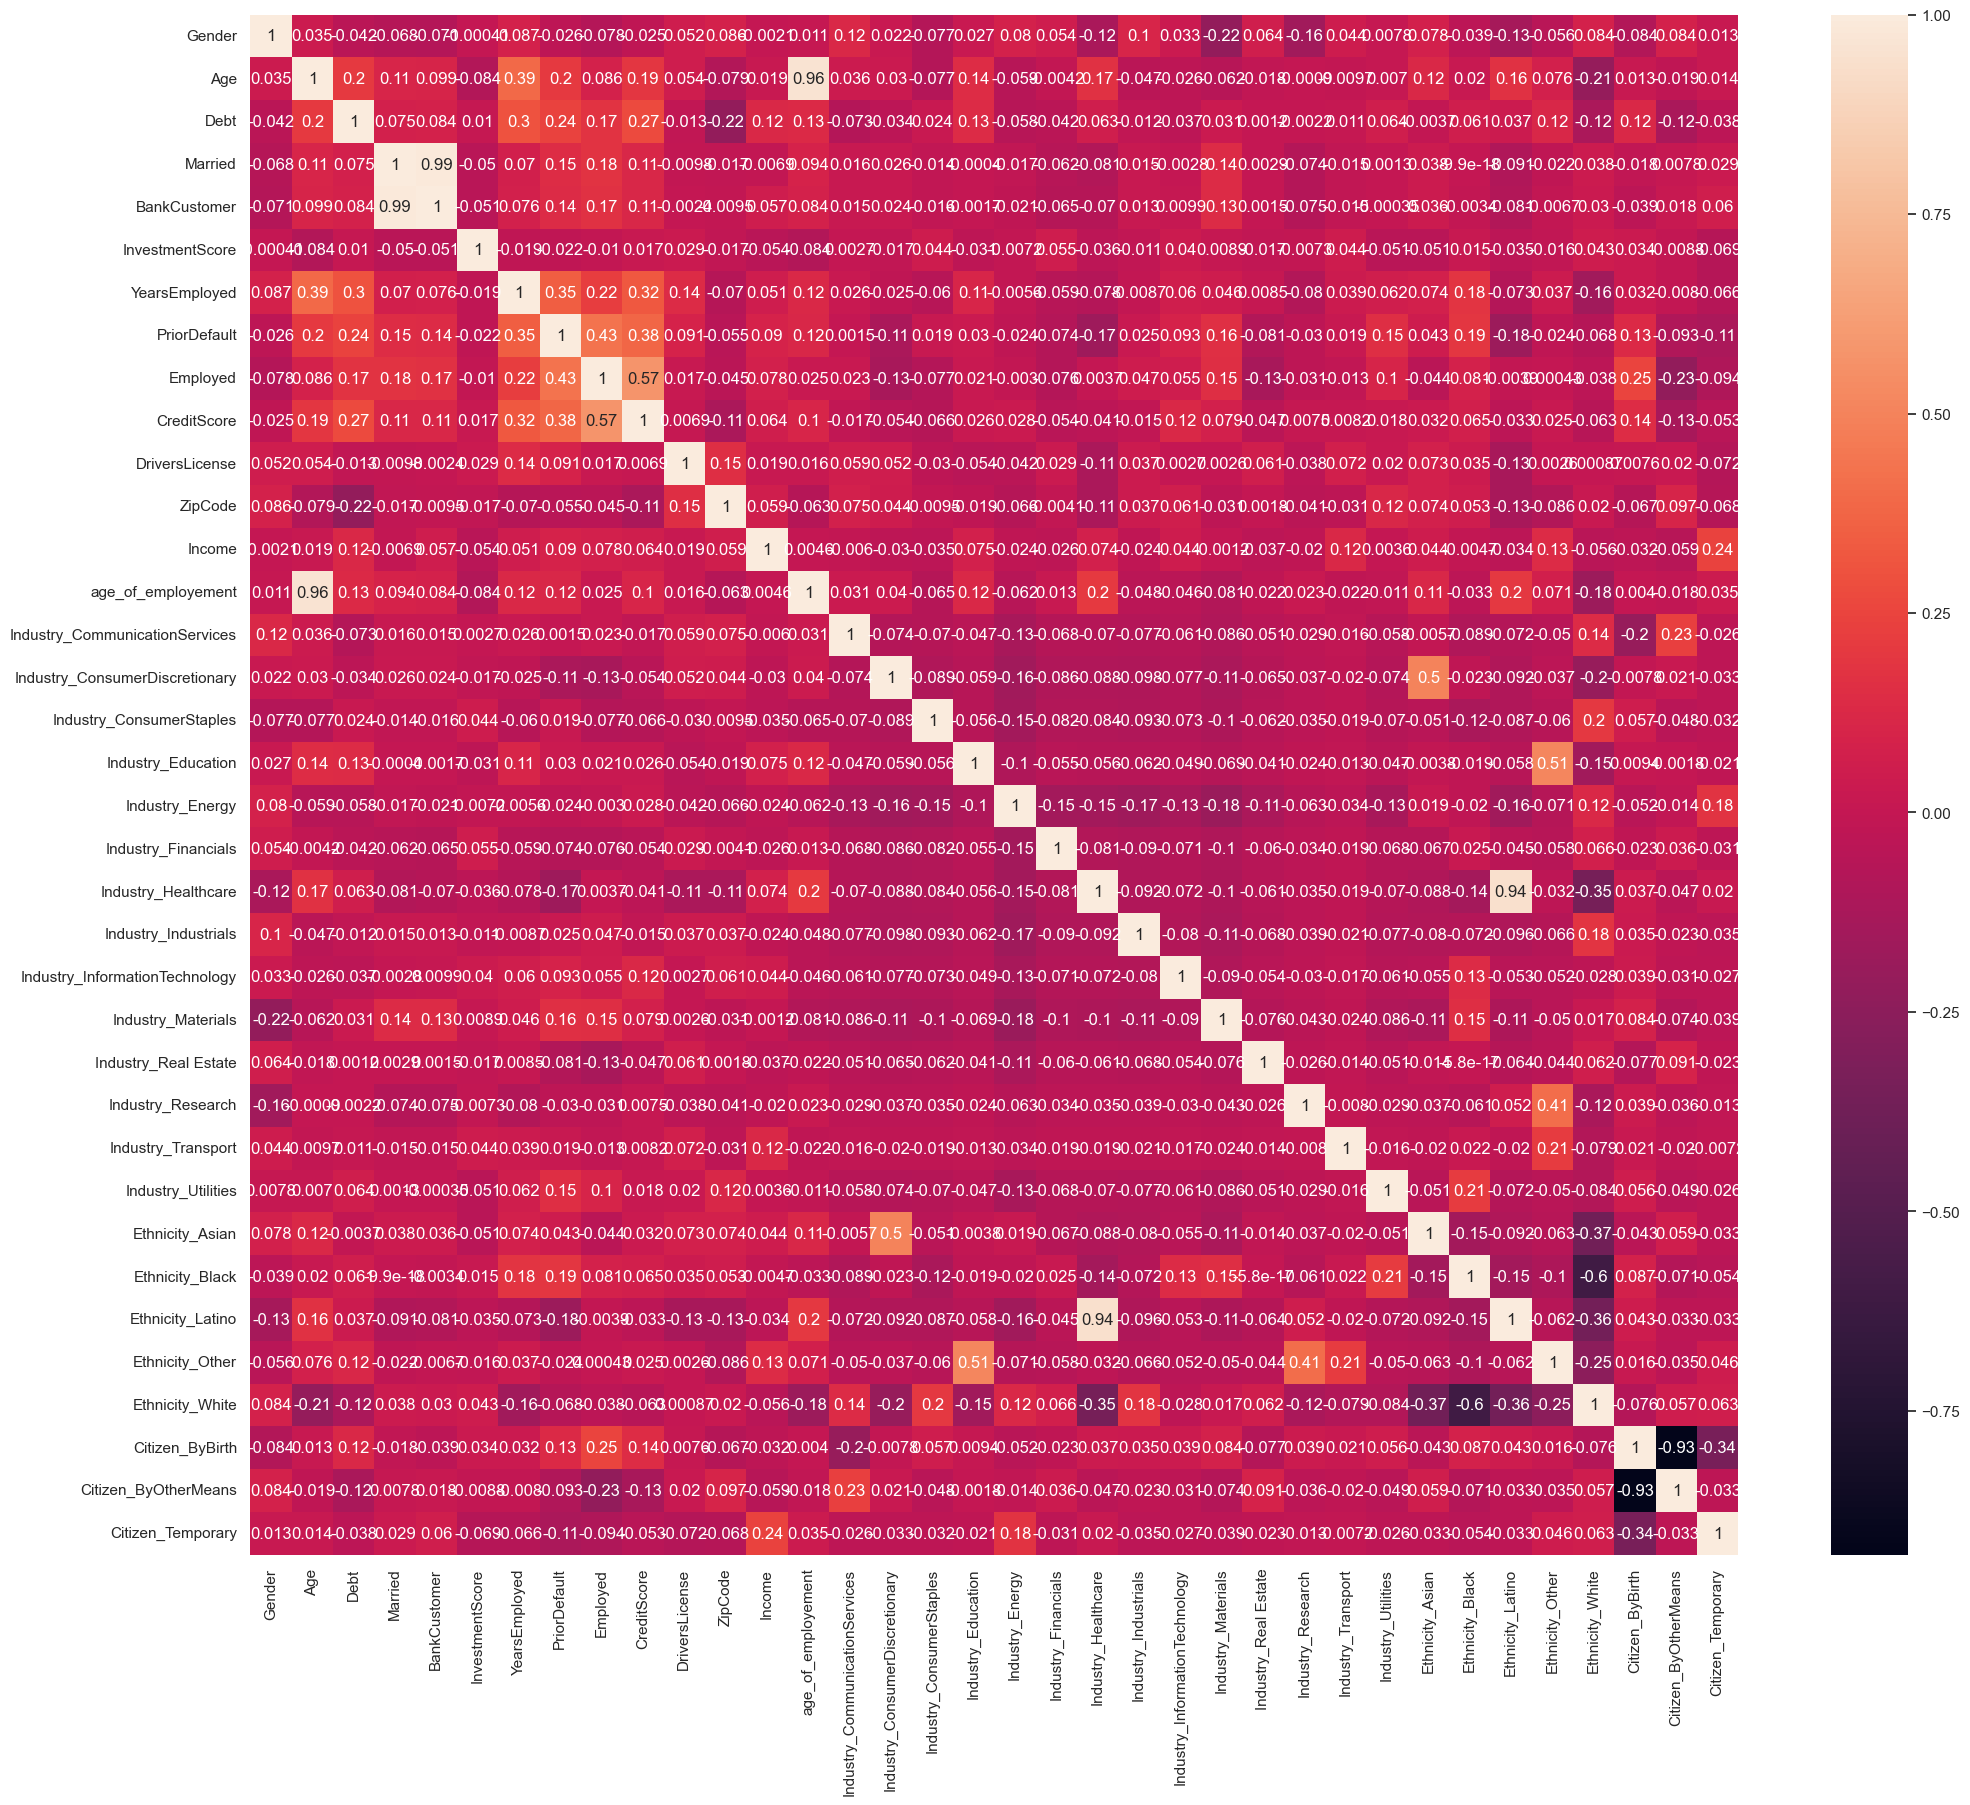

In [47]:
plt.figure(figsize = (24, 20))
ax = sns.heatmap(X.dropna().corr(), annot=True)

In [48]:

df['InvestmentScoretoAge'] = df['InvestmentScore']/df['Age']
df['InvestmentScoretoYearsEmployed'] = df['YearsEmployed']/df['InvestmentScore']

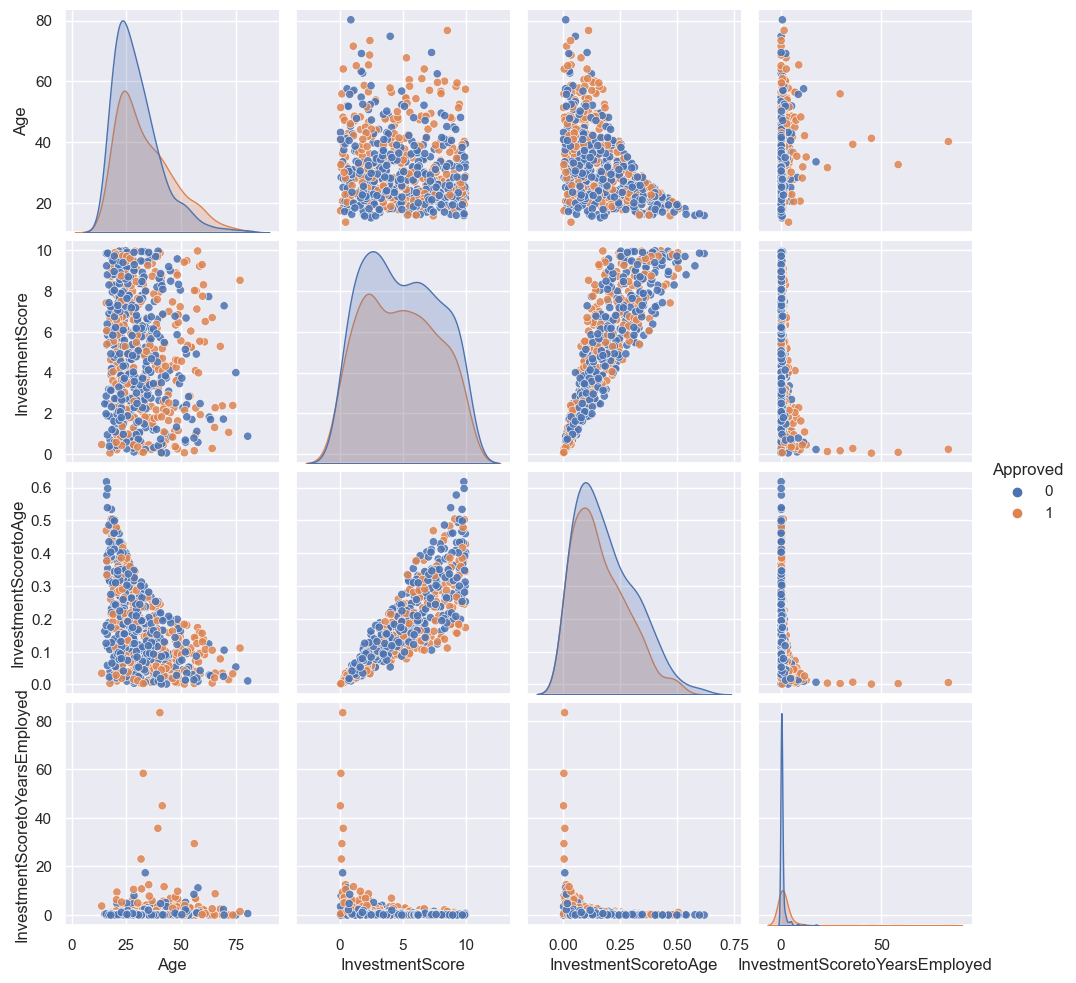

In [49]:
sns.pairplot(df[['Age', 'InvestmentScore','InvestmentScoretoAge','InvestmentScoretoYearsEmployed', 'Approved']], hue="Approved",kind='scatter', plot_kws=dict(alpha=0.85));

In [50]:
y = df.Approved
X = df.iloc[:, df.columns != 'Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=314,
                                                    shuffle=True,
                                                   )
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
clf = LogisticRegression(max_iter=5000)

params = {'C': np.logspace(-10,1,18)}
gs = GridSearchCV(estimator = clf, param_grid = params, cv = cv, verbose=1)
gs.fit(X_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [52]:
gs.best_estimator_

LogisticRegression(C=0.025808615404180765, max_iter=5000)

In [53]:
y_pred = gs.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

0.8466257668711655

### Q5.2

Train an xboost model with f1 score 0.8+

In [56]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score as accuracy

model = xgboost.XGBClassifier()

param_grid = {
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'gamma': np.arange(0.0,30.0,0.01),
        'colsample_bylevel': np.round(np.arange(0.1,1.0,0.05)),
        'subsample': np.arange(0.01,1.0,0.01),
        'colsample_bytree': np.arange(0.1,1.0,0.05)
}

grid_search = RandomizedSearchCV(model, param_grid, scoring="accuracy", n_iter = 500, cv=cv)
grid_result = grid_search.fit(X_train, y_train)


In [62]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_search.predict(X_test)
f1_score(y_test, y_pred)



Best: 0.865464 using {'subsample': 0.92, 'max_depth': 5, 'gamma': 9.27, 'colsample_bytree': 0.20000000000000004, 'colsample_bylevel': 0.0}


0.834355828220859